In [6]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as mp

Ne = 3 # erosion의 정도를 결정
Nd = 9 # dilation의 정도를 결정

path = "/content/drive/My Drive/mary/jjy/radiomics/"
imgname = "T2.nii.gz"
segname = "seg2.nii.gz"
segname_new = "seg2new.nii.gz"

os.environ["MONAI_DATA_DIRECTORY"] = "./data"
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = directory
print(root_dir)

data_path = root_dir
data_dir = os.path.join(data_path, "nifti_data")
images = sorted(glob.glob(os.path.join(data_dir, "image", "*.nii.gz")))
labels = sorted(glob.glob(os.path.join(data_dir, "mask", "*.nii.gz")))
data_dicts = [
    {"image": image_name, "label": label_name}
    for image_name, label_name in zip(images, labels)
    ]


t2 = nib.load(images[0])
msk = nib.load(labels[0])

./data


size of t2 image =  (640, 640, 25)
size of msk image =  (640, 640, 25)
slice # of largest mass: 15


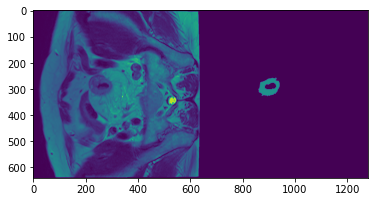

In [7]:
t2img = t2.get_fdata()
print('size of t2 image = ',t2img.shape)
mskimg = msk.get_fdata()
print('size of msk image = ',mskimg.shape)

zzz=np.sum(np.sum(mskimg,axis=1),axis=0)
zmax=np.argmax(zzz)
print('slice # of largest mass:',zmax)

n_slice = zmax # slice number to be displayed
plt.imshow(np.concatenate((t2img[:,:,n_slice],1000*mskimg[:,:,n_slice]),axis=1))

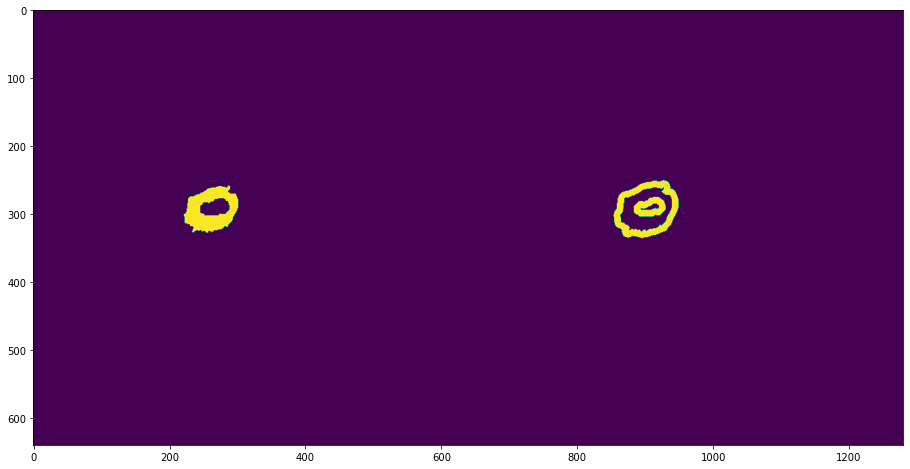

In [8]:
Ne = 2 # erosion의 정도를 결정
Nd = 8 # dilation의 정도를 결정
n_slice = 15

mskimg2 = mskimg>0.5
mskimg2e = np.zeros(mskimg.shape)
mskimg2d = np.zeros(mskimg.shape)
NX,NY,NZ= mskimg.shape
NZ
# for 2d erosion/dilation (for conventional 2D MR images)
for nz in range(NZ):
  mskimg2e[:,:,nz] = mp.binary_erosion(mskimg2[:,:,nz],selem=mp.disk(Ne))
  mskimg2d[:,:,nz] = mp.binary_dilation(mskimg2[:,:,nz],selem=mp.disk(Nd))

# for 3d erosion/dilation (for 3D MR images, not recommended for 2D data with thick slice)
# mskimg2e=mp.binary_erosion(mskimg2,selem=mp.ball(Ne))
# mskimg2d=mp.binary_dilation(mskimg2,selem=mp.ball(Nd))
plt.figure("check", (20, 8))
plt.imshow(np.concatenate((mskimg2[:,:,n_slice],(mskimg2d[:,:,n_slice].astype(int)-mskimg2e[:,:,n_slice].astype(int))>0.5),axis=1))

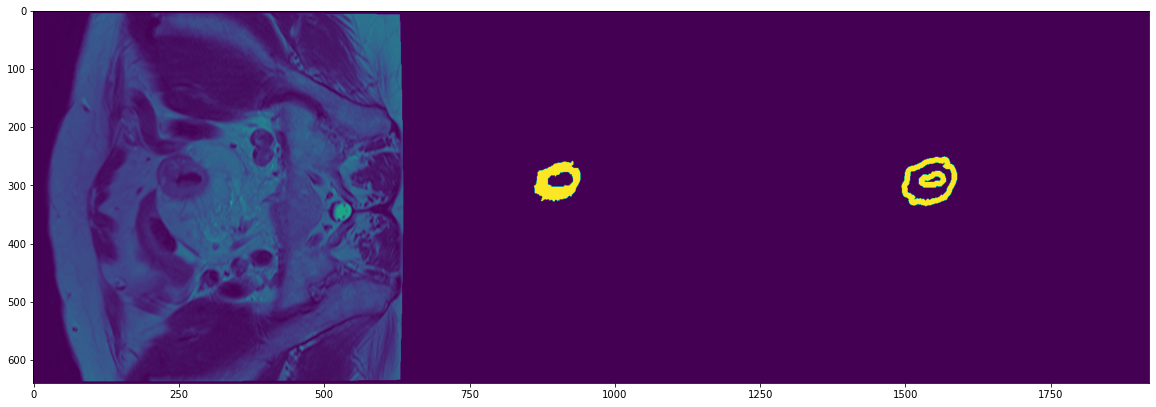

In [16]:

mskimg_new = ((mskimg2d.astype(int)-mskimg2e.astype(int))>0.5).astype(int)
msk_new=nib.Nifti1Image(mskimg_new,msk.affine,msk.header)

text = labels[0]
string = text.split('.nii')
filename = string[0] + "_peritumoral.nii.gz"

#nib.save(msk_new,filename)

plt.figure("check", (20, 8))
plt.imshow(np.concatenate((t2img[:,:,n_slice],3000*mskimg[:,:,n_slice],3000*mskimg_new[:,:,n_slice]),axis=1))

In [26]:
text = labels[0]
string = text.split('/')
filename = string[0]+'/'+string[1]+'/'+string[2]+'/TB/'+string2[0]+"peritumoral.nii.gz"
filename

'./data/nifti_data/TB/P012_13509566_peritumoral.nii.gz'

In [22]:
string2 = string[4].split('mask')
string2

['P012_13509566_', '.nii.gz']